### Portfolio Selection Using PCA on multidimensional features
Name - Don Lakshitha Udara
ID - S4114011
- MSc in Financial Technology 
- Module - Portfolio Management
#### Portfolio Selection Using PCA for Multidimensional factors and Back Testing

<img src="https://miro.medium.com/max/875/1*oSOHZMoS-ZfmuAWiF8jY8Q.png" width=600 height=400 />

Image source is from the following publication

https://www.researchgate.net/figure/Principal-components-analysis-PCA-that-compares-a-the-overall-activity-patterns-of_fig3_331304510

#### PCA
In this code , PCA will be used to a large dimensional data which is retrieve from refinitiv for SP500

following are the considered dimensions
* Total Revenue per Share
* Monthly Total Return 
* Enterprise Value To Sales (Daily Time Series Ratio)
* Price to Total Revenue per Share, 5 Yr Avg
* Credit Combined Global Rank
* ESG Combined Score Grade

By Applying PCA two main PCA components which is represent the entire dimension will be retrieved

#### Portfolio Selection
Portfolio selection will be done through the top most PCA components and the weight allocation will be done according to the PCA
reduced features 

#### Portfolio Optimization & Back Testing
Portfolio optimization and back testing will be done using backtesting.py

can find the tutorials here 

https://kernc.github.io/backtesting.py/#example
https://kernc.github.io/backtesting.py/doc/examples/Strategies%20Library.html

Following Tutorials were also referred for understanding of PCA

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://www.kaggle.com/code/nirajvermafcb/principal-component-analysis-explained/notebook

https://www.youtube.com/watch?v=Stpu0tguCGc

https://medium.com/@zeng.simonl/the-efficient-frontier-in-python-a1bc9496a0a1

Lets <font color='green' >Start</font> !

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Import Model Packages 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import eikon as ek
import os
import plotly.graph_objects as go

from backtesting import Strategy, Backtest
from backtesting.lib import resample_apply


ek.set_app_key('8da94a9712004a2fab768b27a5d4aa6e062e3ec3')

C:\Users\Udara\Anaconda3\lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

#### First Lets see the major package versions , in case

In [3]:
from platform import python_version
print ("Python version")
print (python_version())
print ("Numpy Version") 
print(np.__version__)
print ("Seaborn") 
print(sns.__version__)
print ("Pandas Version") 
print(pd.__version__)
print ("Eikon Version") 
print(ek.__version__)

  

Python version
3.9.7
Numpy Version
1.20.0
Seaborn
0.11.2
Pandas Version
1.4.2
Eikon Version
1.1.14


In [4]:
rics, err = ek.get_data('0#.SPX','CF_Name')
rics

,Instrument,CF_NAME
0,POOL.OQ,POOL CORP/d
1,CHRW.OQ,CH ROBINSON WW/d
2,AJG.N,ARTHUR J GALLA/d
3,CNP.N,CENTERPOINT/d
4,AMCR.N,AMCOR PLC/d
...,...,...
498,DXC.N,DXC TECHNLGY C/d
499,SNPS.OQ,SYNOPSYS/d
500,J.N,JACOB ENGNRG O/d
501,SIVB.OQ,SVB FINANCIAL/d


#### Lets get the intrument list from the above SP500 

In [6]:
instruments = rics['Instrument'].astype(str).values.tolist()

###### Now We can get the data from refinitiv, these feature values were collected from refinitiv's Screener app

In [7]:
df_initial,eff=ek.get_data(instruments, ['TR.F.TotRevPerShr(Period=FY0)',
                                         'TR.TotalReturn6Mo','TR.ESGScore',
                                         'TR.TR.TRESGCControversiesScore',
                                         'TR.EVToSales',
                                         'TR.F.PriceToTotRevPerShr5YrAvg(Period=FY0)',
                                         'TR.CreditComboGlobalRank','TR.TRESGCScoreGrade'])
df_initial

,Instrument,Total Revenue per Share,6 Month Total Return,Enterprise Value To Sales (Daily Time Series Ratio),"Price to Total Revenue per Share, 5 Yr Avg",Credit Combined Global Rank,ESG Combined Score Grade
0,POOL.OQ,130.819763,-37.562929,2.754371,3.225855,37,C+
1,CHRW.OQ,172.617855,-4.179233,0.596374,0.722975,48,C
2,AJG.N,38.959961,-2.356058,4.751689,2.899553,69,B-
3,CNP.N,13.691803,10.580513,3.85413,1.706499,11,C-
4,AMCR.N,8.265424,6.375698,1.778811,<NA>,13,B+
...,...,...,...,...,...,...,...
498,DXC.N,63.731829,-6.989748,0.583576,0.637532,13,B-
499,SNPS.OQ,26.720433,-18.255088,9.335745,7.798745,91,A-
500,J.N,107.352804,-8.888383,1.320554,1.054962,65,B+
501,SIVB.OQ,96.472333,-40.925041,2.725053,5.708806,19,C+


We need to remove the intrument coloumn in order to apply PCA
and we need to standardize the data set as well , for that ESG Grade score could be a problem

In [8]:
df =df_initial

In [9]:
df2 = df_initial.drop (columns= ['Instrument'])

#### Lets Standardize the Data

#### Preparing the data set is important
because if there are any misleading data it could negatively effect on the final outcome , so we need to standadize the data but before that we need to check null values

Remove null value rows ? or replace with 0.0 ??

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200701021039/WhatsApp-Image-2020-07-01-at-2.09.25-AM.jpeg" width=400 height=300 />

Refered this site for data preparing information , above image is from the same source !
https://www.statology.org/pandas-rename-columns/

In [10]:
df = df.fillna(0) # this will replace the nan values with 0.0
df2 = df2.fillna(0)

In [11]:
df.rename(columns = {'Enterprise Value To Sales (Daily Time Series Ratio)':'Value to Sales', 'Price to Total Revenue per Share, 5 Yr Avg':'Revenue Per Share','Credit Combined Global Rank':'Credit Rank'}, inplace = True)
df2.rename(columns = {'Enterprise Value To Sales (Daily Time Series Ratio)':'Value to Sales', 'Price to Total Revenue per Share, 5 Yr Avg':'Revenue Per Share','Credit Combined Global Rank':'Credit Rank'}, inplace = True)

Changed the long coloumn names as well

In [12]:
df

,Instrument,Total Revenue per Share,6 Month Total Return,Value to Sales,Revenue Per Share,Credit Rank,ESG Combined Score Grade
0,POOL.OQ,130.819763,-37.562929,2.754371,3.225855,37,C+
1,CHRW.OQ,172.617855,-4.179233,0.596374,0.722975,48,C
2,AJG.N,38.959961,-2.356058,4.751689,2.899553,69,B-
3,CNP.N,13.691803,10.580513,3.85413,1.706499,11,C-
4,AMCR.N,8.265424,6.375698,1.778811,0.0,13,B+
...,...,...,...,...,...,...,...
498,DXC.N,63.731829,-6.989748,0.583576,0.637532,13,B-
499,SNPS.OQ,26.720433,-18.255088,9.335745,7.798745,91,A-
500,J.N,107.352804,-8.888383,1.320554,1.054962,65,B+
501,SIVB.OQ,96.472333,-40.925041,2.725053,5.708806,19,C+


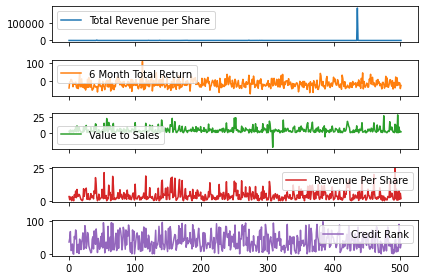

In [16]:
df.plot(subplots=True)

plt.tight_layout()
plt.show()

#### As we have several features , we can plot each one of them and see the nature of the data set

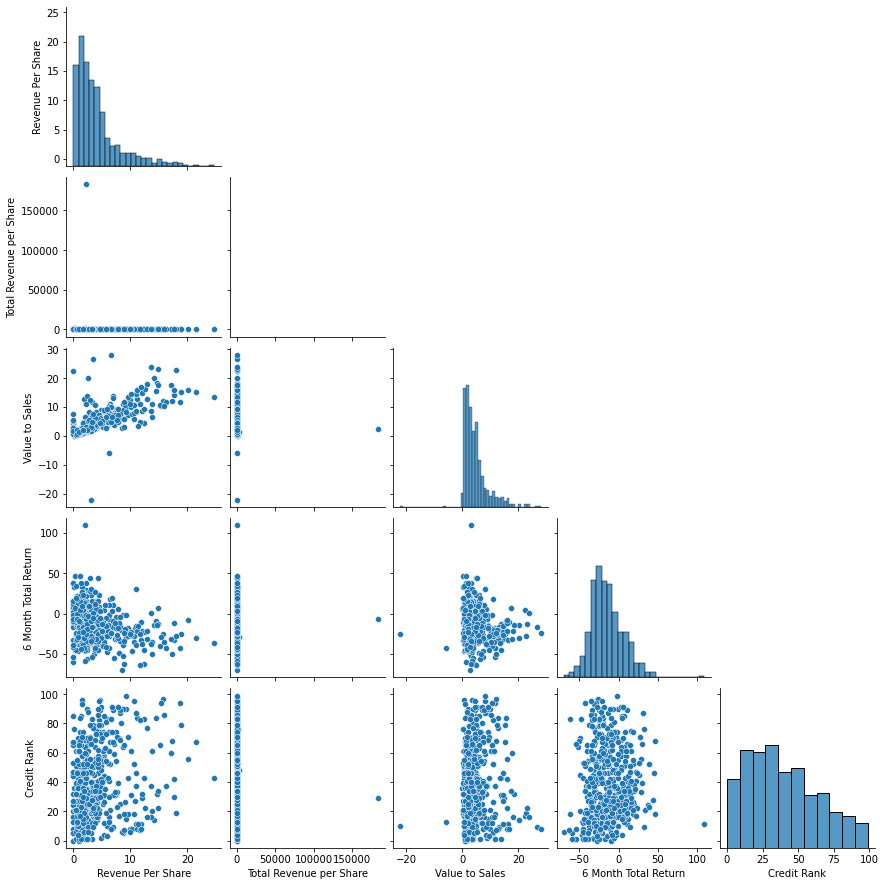

In [17]:

g = sns.pairplot(
    df2[list(
        set(df.select_dtypes(include='number').columns)
        - set(['education-num'])
        ) ],
    height=2.5,
    aspect=1,
)
import numpy as np
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
g.savefig('all_plots.png')    

#### Plotting the Corelation Matrix 

<AxesSubplot:title={'center':'Correlation Matrix'}>

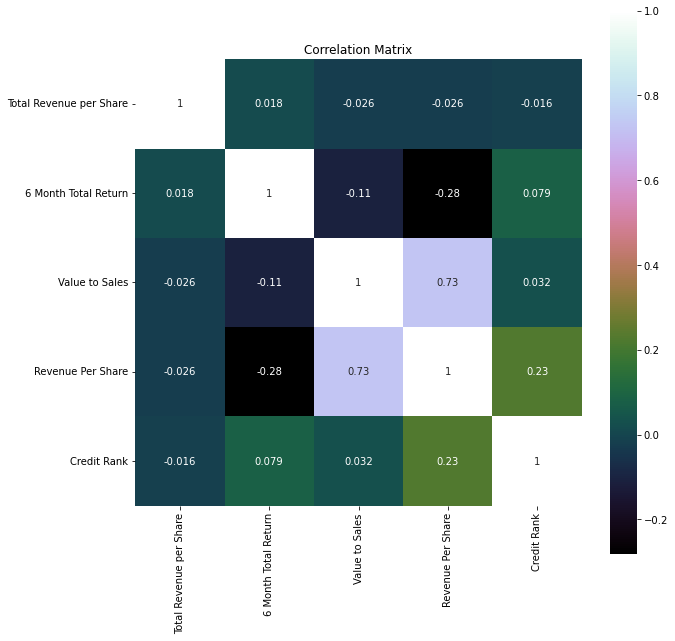

In [15]:
# correlation
correlation = df.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

#### Standadising the features 
commented out another way of scaling 

In [18]:
#features = ['Total Revenue per Share', '6 Month Total Return', 'Value to Sales', 'Revenue Per Share','Credit Rank']

In [19]:
distinct_grade = list(set(df['ESG Combined Score Grade']))
distinct_grade

['C+', '', 'D', 'C-', 'B', 'A-', 'B+', 'B-', 'C', 'A', 'D+']

In [20]:
grades = 'A+ A A- B+ B B- C+ C C- D+ D D- F'.split()
grades.reverse()
gradevalues = {grade: i for i, grade in enumerate(grades, 1)}
assert gradevalues['F'] == 1
assert gradevalues['A+'] == 13

In [21]:
print(gradevalues)

{'F': 1, 'D-': 2, 'D': 3, 'D+': 4, 'C-': 5, 'C': 6, 'C+': 7, 'B-': 8, 'B': 9, 'B+': 10, 'A-': 11, 'A': 12, 'A+': 13}


In [22]:
df['ESG Combined Score Grade'] = df['ESG Combined Score Grade'].map(gradevalues)

In [23]:
df

,Instrument,Total Revenue per Share,6 Month Total Return,Value to Sales,Revenue Per Share,Credit Rank,ESG Combined Score Grade
0,POOL.OQ,130.819763,-37.562929,2.754371,3.225855,37,7.0
1,CHRW.OQ,172.617855,-4.179233,0.596374,0.722975,48,6.0
2,AJG.N,38.959961,-2.356058,4.751689,2.899553,69,8.0
3,CNP.N,13.691803,10.580513,3.85413,1.706499,11,5.0
4,AMCR.N,8.265424,6.375698,1.778811,0.0,13,10.0
...,...,...,...,...,...,...,...
498,DXC.N,63.731829,-6.989748,0.583576,0.637532,13,8.0
499,SNPS.OQ,26.720433,-18.255088,9.335745,7.798745,91,11.0
500,J.N,107.352804,-8.888383,1.320554,1.054962,65,10.0
501,SIVB.OQ,96.472333,-40.925041,2.725053,5.708806,19,7.0


In [ ]:
#x = df.loc[:, features].values

In [ ]:
#x = StandardScaler().fit_transform(x)

In [ ]:
#print(x)

In [25]:
x_set = df.drop('Instrument',1)
x_set = x_set.drop('ESG Combined Score Grade',1)
y_set = df['Instrument']

C:\Users\Udara\AppData\Local\Temp/ipykernel_43508/3789788643.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_set = df.drop('Instrument',1)
C:\Users\Udara\AppData\Local\Temp/ipykernel_43508/3789788643.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_set = x_set.drop('ESG Combined Score Grade',1)


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_set, y_set, test_size=0.2, random_state=0)

#### Train set for training , Test set for testing ..... now you know the drill !!

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [28]:
x_test  =np.nan_to_num(x_test)
x_train =np.nan_to_num(x_train)

In [29]:
x_train

array([[-0.05554589, -1.16106653,  1.3019029 ,  2.95931292,  1.05344851],
       [-0.05142461,  1.05438492, -0.52603838, -0.50584427,  1.01345169],
       [-0.05460848, -1.08643924, -0.61935054, -1.0529694 , -1.02638598],
       ...,
       [-0.05384937,  1.37305392, -0.44891565, -0.81114335, -0.66641463],
       [-0.05622982, -0.66370076, -0.54395836, -0.56062818, -0.74640826],
       [-0.0319668 ,  1.66155219, -0.75038531, -0.78868925, -0.02646556]])

In [30]:
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [32]:
variance_4 = pca.explained_variance_ratio_
variance_4

array([0.35864927, 0.21470373, 0.19971831, 0.17688605, 0.05004264])

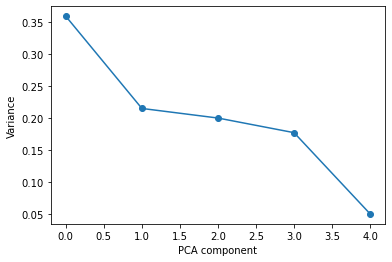

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame({
      'x_axis': range(0,5),
      'y_axis': variance_4
  })

plt.xlabel("PCA component")
plt.ylabel("Variance")
plt.plot('x_axis', 'y_axis', data=df, linestyle='-', marker='o')
plt.show()

##### This means that the first 3 PCA components will repesent more than 75% of the entire data set

In [34]:
pca = PCA(n_components=3)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
principalDf = pd.DataFrame(data = x_test
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [35]:
principalDf

,principal component 1,principal component 2,principal component 3
0,0.629347,1.309228,-0.113236
1,0.677949,-0.118210,-0.036249
2,-0.343591,-0.257392,-0.012963
3,0.841623,0.522673,0.006447
4,0.551828,-0.948633,-0.070148
...,...,...,...
96,-0.217587,0.317522,-0.017585
97,4.012490,0.368042,0.315095
98,3.074353,-1.310018,0.217885
99,5.340093,-0.244466,0.280842


In [36]:
variance = pca.explained_variance_ratio_
variance

array([0.35864927, 0.21470373, 0.19971831])

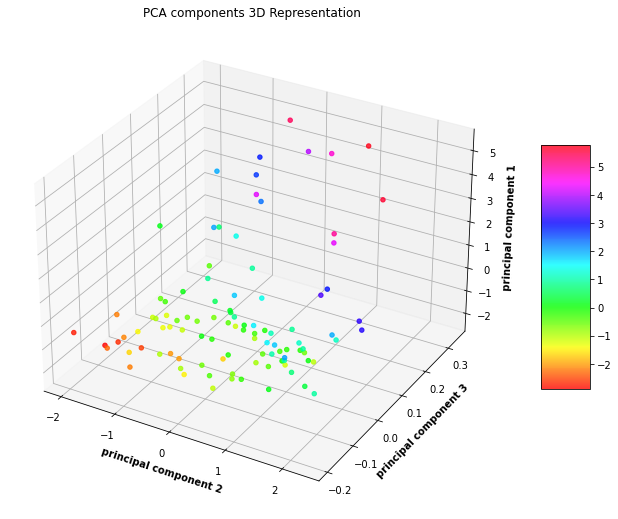

In [37]:
from mpl_toolkits import mplot3d

z = principalDf['principal component 1']
x = principalDf['principal component 2']
y = principalDf['principal component 3']

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.3,
		alpha = 0.2)


# Creating color map
my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter3D(x, y, z,
					alpha = 0.8,
					c = (x + y + z),
					cmap = my_cmap,
					marker ='o')

plt.title("PCA components 3D Representation")
ax.set_xlabel('principal component 2', fontweight ='bold')
ax.set_ylabel('principal component 3', fontweight ='bold')
ax.set_zlabel('principal component 1', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()



#### Above is the 3D space representation of PCA components 
plot tutorial - https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/

In [38]:
pca.explained_variance_ratio_

array([0.35864927, 0.21470373, 0.19971831])

#### This Means that PCA1 and PCA2 represent nearly 60 % of the entire dimension 

In [39]:
principalDf['Instrument'] = df_initial['Instrument']

#### PCA1 & PCA2 relation in a scattered diagram just to see the first two compnents , ( this is optional )

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

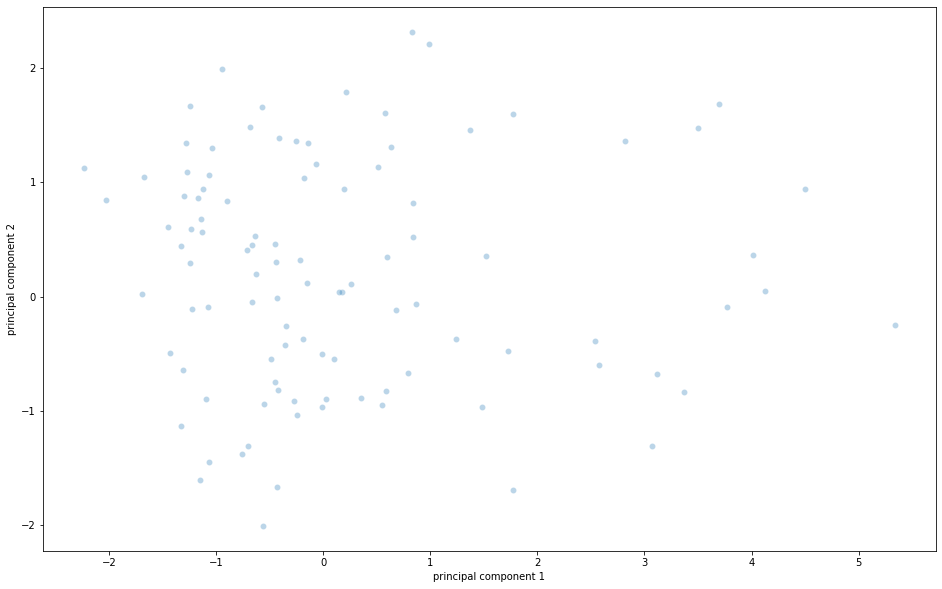

In [40]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    palette=sns.color_palette("hls", 10),
    data=principalDf,
    legend="full",
    alpha=0.3
)

In [41]:
principalDf # with instruments , 

,principal component 1,principal component 2,principal component 3,Instrument
0,0.629347,1.309228,-0.113236,POOL.OQ
1,0.677949,-0.118210,-0.036249,CHRW.OQ
2,-0.343591,-0.257392,-0.012963,AJG.N
3,0.841623,0.522673,0.006447,CNP.N
4,0.551828,-0.948633,-0.070148,AMCR.N
...,...,...,...,...
96,-0.217587,0.317522,-0.017585,PM.N
97,4.012490,0.368042,0.315095,COO.N
98,3.074353,-1.310018,0.217885,SNA.N
99,5.340093,-0.244466,0.280842,UAL.OQ


In [42]:
pca.explained_variance_ratio_

array([0.35864927, 0.21470373, 0.19971831])

#### Allocating weights according to PCA1 and PCA2

In [43]:
principalDf['weight'] = principalDf.apply(lambda row : (row['principal component 1']*pca.explained_variance_ratio_[0] + 
                                             row['principal component 2']*pca.explained_variance_ratio_[1] +row['principal component 3']*pca.explained_variance_ratio_[2])/3, 
                                             axis = 1) 
principalDf = principalDf.sort_values(by=['weight'], ascending=False)

In [44]:
principalDf # with weights 

,principal component 1,principal component 2,principal component 3,Instrument,weight
99,5.340093,-0.244466,0.280842,UAL.OQ,0.639607
22,4.496378,0.941230,0.336542,MCO.N,0.627307
81,3.699355,1.688529,0.224233,PFG.OQ,0.578029
14,3.500247,1.474457,0.076935,QRVO.OQ,0.529099
97,4.012490,0.368042,0.315095,COO.N,0.527009
...,...,...,...,...,...
20,-1.429668,-0.490002,-0.096974,CARR.N,-0.212441
89,-0.562187,-2.007165,-0.179192,LNT.OQ,-0.222787
52,-1.067635,-1.446578,-0.130030,EXPD.OQ,-0.239821
72,-1.322374,-1.132993,-0.107548,SEE.N,-0.246335


#### We don't need a weighted portfolio of 500 instruments , this is way to large and most difficult thing is to retrieve data from refinitive for a large asset portfolio , therefore we will limit the set ,( there are data limit restrictions in refinitive)

Remember we sorted the PCA list with assets , therefore we can slice the top cream of the assets to create our portfolio

In [45]:
portfolio_df_15 = principalDf.head(15)

In [46]:
portfolio_df_15 

,principal component 1,principal component 2,principal component 3,Instrument,weight
99,5.340093,-0.244466,0.280842,UAL.OQ,0.639607
22,4.496378,0.941230,0.336542,MCO.N,0.627307
81,3.699355,1.688529,0.224233,PFG.OQ,0.578029
14,3.500247,1.474457,0.076935,QRVO.OQ,0.529099
97,4.012490,0.368042,0.315095,COO.N,0.527009
18,4.128831,0.052668,0.085311,AIG.N,0.503049
64,3.771158,-0.085563,0.321023,GRMN.N,0.466089
9,2.819116,1.364644,0.101627,WY.N,0.441455
48,3.373440,-0.830327,0.286565,MAS.N,0.362947
77,3.119029,-0.677324,0.239648,TXN.OQ,0.340359


#### Now we need to re scale our weights accordingly , and it should be sum up to 1.0

In [47]:
arr2 = portfolio_df_15['weight']

In [48]:
arr_sum = arr2 / arr2.min()

In [49]:
arr_sum= arr_sum / arr_sum.sum()
arr_sum

99    0.098907
22    0.097005
81    0.089384
14    0.081818
97    0.081495
18    0.077790
64    0.072074
9     0.068265
48    0.056125
77    0.052632
33    0.050506
59    0.044610
98    0.044580
56    0.042812
66    0.041997
Name: weight, dtype: float64

In [50]:
arr_sum.sum() 

1.0

#### Sum of the weights are 1.0 :)

In [51]:
portfolio_df_15['weight'] = arr_sum


C:\Users\Udara\AppData\Local\Temp/ipykernel_43508/706634445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio_df_15['weight'] = arr_sum


In [52]:
portfolio_df_15 # Final portfolio 

,principal component 1,principal component 2,principal component 3,Instrument,weight
99,5.340093,-0.244466,0.280842,UAL.OQ,0.098907
22,4.496378,0.941230,0.336542,MCO.N,0.097005
81,3.699355,1.688529,0.224233,PFG.OQ,0.089384
14,3.500247,1.474457,0.076935,QRVO.OQ,0.081818
97,4.012490,0.368042,0.315095,COO.N,0.081495
18,4.128831,0.052668,0.085311,AIG.N,0.077790
64,3.771158,-0.085563,0.321023,GRMN.N,0.072074
9,2.819116,1.364644,0.101627,WY.N,0.068265
48,3.373440,-0.830327,0.286565,MAS.N,0.056125
77,3.119029,-0.677324,0.239648,TXN.OQ,0.052632


#### Lets plot the weights against the instruments to see the weight distrubition 
Remember we sliced the entire set , so the distribution will not leads towards a zero here 

([<matplotlib.axis.XTick at 0x23b13f56700>,
 [Text(1, 0, 'UAL.OQ'),
  Text(2, 0, 'MCO.N'),
  Text(3, 0, 'PFG.OQ'),
  Text(4, 0, 'QRVO.OQ'),
  Text(5, 0, 'COO.N'),
  Text(6, 0, 'AIG.N'),
  Text(7, 0, 'GRMN.N'),
  Text(8, 0, 'WY.N'),
  Text(9, 0, 'MAS.N'),
  Text(10, 0, 'TXN.OQ'),
  Text(11, 0, 'VTR.N'),
  Text(12, 0, 'UNH.N'),
  Text(13, 0, 'SNA.N'),
  Text(14, 0, 'CL.N'),
  Text(15, 0, 'ISRG.OQ')])

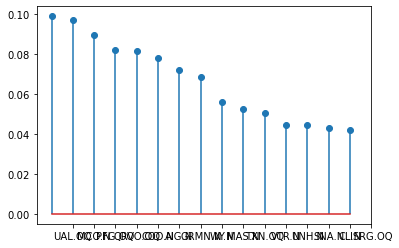

In [53]:
my_range=range(1,len(portfolio_df_15.index)+1)

plt.stem(portfolio_df_15['weight'])
plt.xticks( my_range, portfolio_df_15['Instrument'])

#### BACK TESTING  & OPTIMISATION

In [54]:
port_ins = portfolio_df_15['Instrument'].astype(str).values.tolist()

In [ ]:
#Tried with gettime series API in refinitiv but with the data limit its not possible to get all of the values 
#  # saving the Data in a file in case connectivity errors with refinitiv
# if not os.path.isfile('./back_test1t.csv'):
 
#     df_bt = ek.get_timeseries(port_ins,
#                            start_date='2014-01-01',
#                            end_date='2022-06-15',
#                            fields ='*',
#                            interval='daily',)
#     df_bt.to_csv('./back_test1.csv')
# else:
#     df_bt = pd.read_csv('./back_test1.csv',index_col='Date',parse_dates=True)

In [55]:
df_bt, err = ek.get_data(
    instruments = port_ins ,
    fields = ['TR.CLOSEPRICE.Date','TR.CLOSEPRICE','TR.OPENPRICE','TR.HIGHPRICE','TR.LOWPRICE'],
    parameters = {'SDate':'2016-02-01','EDate':'2022-06-15','Curn':'GBP'}
)

In [56]:
df_bt.rename(columns = {'Close Price':'Close', 'High Price':'High','Low Price':'Low','Open Price':'Open','VOLUME':'Volume','COUNT':'Count'}, inplace = True)

In [57]:
df_bt

,Instrument,Date,Close,Open,High,Low
0,UAL.OQ,2016-02-01T00:00:00Z,33.862423,32.933736,34.09113,32.933736
1,UAL.OQ,2016-02-02T00:00:00Z,32.239087,33.509217,33.564742,31.961463
2,UAL.OQ,2016-02-03T00:00:00Z,32.584499,31.940617,33.084534,30.865199
3,UAL.OQ,2016-02-04T00:00:00Z,33.186991,32.371199,33.317244,32.275223
4,UAL.OQ,2016-02-05T00:00:00Z,32.317468,33.386441,33.893341,32.055397
...,...,...,...,...,...,...
24085,ISRG.OQ,2022-06-09T00:00:00Z,168.094368,173.218464,173.530714,168.078355
24086,ISRG.OQ,2022-06-10T00:00:00Z,166.695662,167.938144,168.758345,165.436938
24087,ISRG.OQ,2022-06-13T00:00:00Z,160.680626,164.00187,165.023791,159.683429
24088,ISRG.OQ,2022-06-14T00:00:00Z,159.343002,162.286387,162.511518,157.458569


#### Lets process the new data set 

In [58]:
df_bt = df_bt.drop(columns =['Instrument'])
df_bt

,Date,Close,Open,High,Low
0,2016-02-01T00:00:00Z,33.862423,32.933736,34.09113,32.933736
1,2016-02-02T00:00:00Z,32.239087,33.509217,33.564742,31.961463
2,2016-02-03T00:00:00Z,32.584499,31.940617,33.084534,30.865199
3,2016-02-04T00:00:00Z,33.186991,32.371199,33.317244,32.275223
4,2016-02-05T00:00:00Z,32.317468,33.386441,33.893341,32.055397
...,...,...,...,...,...
24085,2022-06-09T00:00:00Z,168.094368,173.218464,173.530714,168.078355
24086,2022-06-10T00:00:00Z,166.695662,167.938144,168.758345,165.436938
24087,2022-06-13T00:00:00Z,160.680626,164.00187,165.023791,159.683429
24088,2022-06-14T00:00:00Z,159.343002,162.286387,162.511518,157.458569


In [59]:
df_bt = df_bt.fillna(0)

In [60]:
df_bt = df_bt.set_index('Date')

#### This is not using the get_timeseries API in refinitiv , therefore we need to transpose the data set ,and there are duplicates  and we need to merge them together to create the combined dataset

Checking for duplicated , since this is not the type of data frame we used to have in refinitive

In [61]:
df_bt.duplicated()

Date
2016-02-01T00:00:00Z    False
2016-02-02T00:00:00Z    False
2016-02-03T00:00:00Z    False
2016-02-04T00:00:00Z    False
2016-02-05T00:00:00Z    False
                        ...  
2022-06-09T00:00:00Z    False
2022-06-10T00:00:00Z    False
2022-06-13T00:00:00Z    False
2022-06-14T00:00:00Z    False
2022-06-15T00:00:00Z    False
Length: 24090, dtype: bool

In [62]:
df_bt = df_bt.groupby(df_bt.index).sum()

In [63]:
df_bt # Finally a data set that we can work with 

,Close,Open,High,Low
Date,,,,
2016-02-01T00:00:00Z,693.86551,686.984182,698.795694,681.683031
2016-02-02T00:00:00Z,676.049075,686.313816,691.159125,671.440414
2016-02-03T00:00:00Z,668.535371,670.827419,675.058598,651.638656
2016-02-04T00:00:00Z,668.98967,669.186303,679.70767,658.019948
2016-02-05T00:00:00Z,655.534774,669.372536,673.590815,648.241207
...,...,...,...,...
2022-06-09T00:00:00Z,1838.853907,1864.69056,1879.150118,1836.143741
2022-06-10T00:00:00Z,1822.737922,1835.723082,1851.558642,1810.767863
2022-06-13T00:00:00Z,1784.49693,1809.229072,1826.453389,1773.6555


<AxesSubplot:ylabel='Density'>

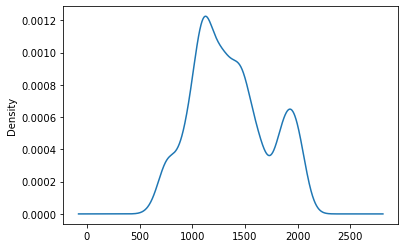

In [64]:
df_bt['Close'].plot(kind ='kde') # data distribution

In [65]:
df_bt.index = pd.to_datetime(df_bt.index, format='%Y-%m-%d')

In [66]:
df_bt

,Close,Open,High,Low
Date,,,,
2016-02-01 00:00:00+00:00,693.86551,686.984182,698.795694,681.683031
2016-02-02 00:00:00+00:00,676.049075,686.313816,691.159125,671.440414
2016-02-03 00:00:00+00:00,668.535371,670.827419,675.058598,651.638656
2016-02-04 00:00:00+00:00,668.98967,669.186303,679.70767,658.019948
2016-02-05 00:00:00+00:00,655.534774,669.372536,673.590815,648.241207
...,...,...,...,...
2022-06-09 00:00:00+00:00,1838.853907,1864.69056,1879.150118,1836.143741
2022-06-10 00:00:00+00:00,1822.737922,1835.723082,1851.558642,1810.767863
2022-06-13 00:00:00+00:00,1784.49693,1809.229072,1826.453389,1773.6555


In [67]:
start='2014-01-01'
end='2022-12-31'
instruments = portfolio_df_15['Instrument'].astype(str).values.tolist()
print(instruments)

['UAL.OQ', 'MCO.N', 'PFG.OQ', 'QRVO.OQ', 'COO.N', 'AIG.N', 'GRMN.N', 'WY.N', 'MAS.N', 'TXN.OQ', 'VTR.N', 'UNH.N', 'SNA.N', 'CL.N', 'ISRG.OQ']


#### Lets calculate returns and volatility

In [68]:
ts =pd.DataFrame()
ts1 = ek.get_timeseries('PFG.OQ','CLOSE',start_date=start,end_date=end,interval='daily')

In [69]:
for r in portfolio_df_15['Instrument']:
    try:
        ts1 = ek.get_timeseries(r,'CLOSE',start_date=start,end_date=end,interval='daily')
        ts1.rename(columns = {'CLOSE' : r}, inplace=True)
        ts =pd.concat([ts, ts1], axis=1)
    except:
        continue

ts = ts.dropna()

ts.head()

,UAL.OQ,MCO.N,PFG.OQ,QRVO.OQ,COO.N,AIG.N,GRMN.N,WY.N,MAS.N,TXN.OQ,VTR.N,UNH.N,SNA.N,CL.N,ISRG.OQ
Date,,,,,,,,,,,,,,,
2014-01-02,37.73,77.32,48.62,19.4,123.05,50.71,44.95,29.766675,19.942014,43.1,49.620443,74.57,108.55,64.3,42.223249
2014-01-03,39.95,77.83,48.96,19.4,123.55,50.92,46.58,29.83331,20.355092,43.29,49.594244,75.1,108.76,64.18,41.495473
2014-01-06,39.36,77.83,49.01,19.4,122.27,50.52,46.41,29.528694,20.073848,42.93,50.825586,74.24,107.63,64.14,41.215473
2014-01-07,38.69,77.89,49.04,19.4,123.95,51.21,45.68,29.614367,20.082636,42.72,50.843052,76.51,107.88,64.2,41.528806
2014-01-08,41.02,76.28,49.13,19.04,124.07,51.81,45.4,29.338309,20.240837,43.29,50.554865,75.62,107.76,63.54,42.273249


In [70]:
log_returns = np.log(ts/ts.shift(1))

In [71]:
log_returns.mean() * 252

UAL.OQ    -0.004099
MCO.N      0.149444
PFG.OQ     0.039124
QRVO.OQ    0.183977
COO.N      0.112047
AIG.N      0.003005
GRMN.N     0.092412
WY.N       0.015596
MAS.N      0.112026
TXN.OQ     0.145773
VTR.N      0.007183
UNH.N      0.228211
SNA.N      0.070954
CL.N       0.028604
ISRG.OQ    0.186778
dtype: float64

In [72]:
log_returns.cov() * 252
log_returns.corr()

,UAL.OQ,MCO.N,PFG.OQ,QRVO.OQ,COO.N,AIG.N,GRMN.N,WY.N,MAS.N,TXN.OQ,VTR.N,UNH.N,SNA.N,CL.N,ISRG.OQ
UAL.OQ,1.000000,0.399665,0.584210,0.331804,0.326868,0.572611,0.327345,0.481051,0.337235,0.359905,0.490905,0.306076,0.458692,0.164071,0.333942
MCO.N,0.399665,1.000000,0.584235,0.462459,0.488434,0.520699,0.508968,0.576820,0.564772,0.574462,0.371213,0.530345,0.505644,0.461310,0.536841
PFG.OQ,0.584210,0.584235,1.000000,0.407294,0.415823,0.777974,0.490985,0.632829,0.520461,0.495158,0.485709,0.468201,0.633170,0.348061,0.440884
QRVO.OQ,0.331804,0.462459,0.407294,1.000000,0.365029,0.363789,0.408168,0.408006,0.387254,0.613482,0.225587,0.346530,0.396033,0.219183,0.394336
COO.N,0.326868,0.488434,0.415823,0.365029,1.000000,0.414851,0.343531,0.415157,0.377313,0.460037,0.313382,0.457788,0.385004,0.347585,0.502961
AIG.N,0.572611,0.520699,0.777974,0.363789,0.414851,1.000000,0.419124,0.585840,0.463862,0.424125,0.537584,0.438149,0.581558,0.324631,0.397616
GRMN.N,0.327345,0.508968,0.490985,0.408168,0.343531,0.419124,1.000000,0.476408,0.445399,0.495483,0.280461,0.383001,0.455247,0.322451,0.422448
WY.N,0.481051,0.576820,0.632829,0.408006,0.415157,0.585840,0.476408,1.000000,0.538696,0.490525,0.569139,0.486329,0.585718,0.421925,0.447731
MAS.N,0.337235,0.564772,0.520461,0.387254,0.377313,0.463862,0.445399,0.538696,1.000000,0.488526,0.295922,0.437691,0.532851,0.397716,0.416026
TXN.OQ,0.359905,0.574462,0.495158,0.613482,0.460037,0.424125,0.495483,0.490525,0.488526,1.000000,0.268510,0.447302,0.477314,0.378261,0.488019


In [73]:
portfolio_returns = []
portfolio_volatilities = []
for x in range(1000):
    weights = np.random.random(15)
    weights /= np.sum(weights)
    
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,                                    np.dot(log_returns.cov() * 250, weights))))
                    
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)
                                  
portfolio_returns, portfolio_volatilities

(array([0.08579814, 0.08972007, 0.10701555, 0.10164877, 0.08573634,
        0.08566192, 0.08090897, 0.10021688, 0.07829288, 0.09800449,
        0.09309041, 0.10433742, 0.10009177, 0.07256321, 0.1023629 ,
        0.08126951, 0.08432784, 0.0811898 , 0.09541761, 0.07105429,
        0.07625582, 0.09987533, 0.09266519, 0.106293  , 0.0886929 ,
        0.09472781, 0.10334138, 0.09435621, 0.09268185, 0.11136677,
        0.06424726, 0.08809724, 0.09431106, 0.07341857, 0.10302679,
        0.06742607, 0.0952455 , 0.08951008, 0.07552411, 0.08960716,
        0.08850806, 0.08527468, 0.08098138, 0.09376472, 0.08630618,
        0.07633384, 0.09224244, 0.08572424, 0.0863558 , 0.10161382,
        0.05836157, 0.0743304 , 0.08582879, 0.06049765, 0.08124478,
        0.08972541, 0.06918365, 0.08496344, 0.10063179, 0.09113625,
        0.10270386, 0.07849901, 0.11033504, 0.09360018, 0.08765611,
        0.0995406 , 0.08667223, 0.08321805, 0.07590743, 0.07377748,
        0.09465476, 0.09821943, 0.07662327, 0.08

In [74]:
np.sum(weights * log_returns.mean()) * 250
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.2073199694042146

In [75]:
import matplotlib.pyplot as plt1
%matplotlib inline

Text(0, 0.5, 'Expected Return')

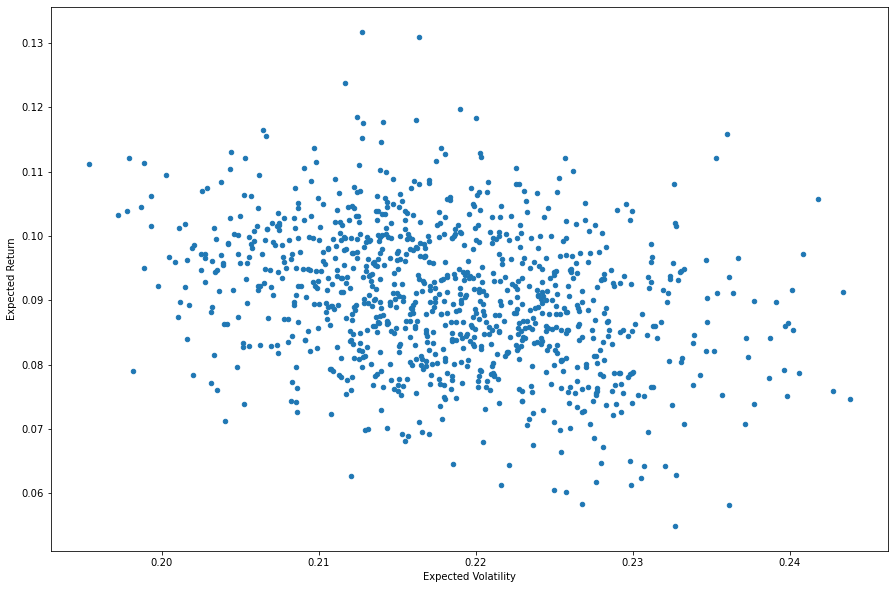

In [76]:
portfolios = pd.DataFrame({'Return': portfolio_returns, 'Volatility':portfolio_volatilities  })
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(15,10));
plt1.xlabel('Expected Volatility')
plt1.ylabel('Expected Return')

#### Back Testing 

Got tthis backtesting from backtesting.py site 
tutorial :
https://kernc.github.io/backtesting.py/doc/examples/Multiple%20Time%20Frames.html

In [77]:
from backtesting.test import SMA

In [78]:
import pandas as pd


def SMA(array, n):
    """Simple moving average"""
    return pd.Series(array).rolling(n).mean()


def RSI(array, n):
    """Relative strength index"""
    # Approximate; good enough
    gain = pd.Series(array).diff()
    loss = gain.copy()
    gain[gain < 0] = 0
    loss[loss > 0] = 0
    rs = gain.ewm(n).mean() / loss.abs().ewm(n).mean()
    return 100 - 100 / (1 + rs)

#### Setting up the System parameter for the back testing
Got this from their original tutorial web page
https://kernc.github.io/backtesting.py/doc/examples/Multiple%20Time%20Frames.html

In [79]:

class System(Strategy):
    d_rsi = 30  # Daily RSI lookback periods
    w_rsi = 30  # Weekly
    level = 70
    
    def init(self):
        # Compute moving averages the strategy demands
        self.ma10 = self.I(SMA, self.data.Close, 10)
        self.ma20 = self.I(SMA, self.data.Close, 20)
        self.ma50 = self.I(SMA, self.data.Close, 50)
        self.ma100 = self.I(SMA, self.data.Close, 100)
        
        # Compute daily RSI(30)
        self.daily_rsi = self.I(RSI, self.data.Close, self.d_rsi)
        
        # To construct weekly RSI, we can use `resample_apply()`
        # helper function from the library
        self.weekly_rsi = resample_apply(
            'W-FRI', RSI, self.data.Close, self.w_rsi)
        
        
    def next(self):
        price = self.data.Close[-1]
        
        # If we don't already have a position, and
        # if all conditions are satisfied, enter long.
        if (not self.position and
            self.daily_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.daily_rsi[-1] and
            self.ma10[-1] > self.ma20[-1] > self.ma50[-1] > self.ma100[-1] and
            price > self.ma10[-1]):
            
            # Buy at market price on next open, but do
            # set 8% fixed stop loss.
            self.buy(sl=.92 * price)
        
        # If the price closes 2% or more below 10-day MA
        # close the position, if any.
        elif price < .98 * self.ma10[-1]:
            self.position.close()

In [80]:
backtest = Backtest(df_bt, System, commission=.002)
backtest.run()

Start                     2016-02-01 00:00...
End                       2022-06-15 00:00...
Duration                   2326 days 00:00:00
Exposure Time [%]                    2.988792
Equity Final [$]                 10056.898045
Equity Peak [$]                  10740.096879
Return [%]                            0.56898
Buy & Hold Return [%]              155.401113
Return (Ann.) [%]                    0.089066
Volatility (Ann.) [%]                2.614928
Sharpe Ratio                         0.034061
Sortino Ratio                        0.045254
Calmar Ratio                         0.014001
Max. Drawdown [%]                   -6.361198
Avg. Drawdown [%]                   -1.451584
Max. Drawdown Duration     2130 days 00:00:00
Avg. Drawdown Duration      240 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                       0.592745
Worst Trade [%]                      0.592745
Avg. Trade [%]                    

In [81]:
%%time

history = backtest.optimize(d_rsi=range(10, 35, 5),
                  w_rsi=range(10, 35, 5),
                  level=range(30, 80, 10))

  0%|          | 0/9 [00:00<?, ?it/s]

Wall time: 11.6 s


In [82]:
history

Start                     2016-02-01 00:00...
End                       2022-06-15 00:00...
Duration                   2326 days 00:00:00
Exposure Time [%]                   39.352428
Equity Final [$]                 10496.168109
Equity Peak [$]                  11692.557251
Return [%]                           4.961681
Buy & Hold Return [%]              155.401113
Return (Ann.) [%]                    0.762741
Volatility (Ann.) [%]                8.266415
Sharpe Ratio                          0.09227
Sortino Ratio                        0.126692
Calmar Ratio                         0.055021
Max. Drawdown [%]                  -13.862739
Avg. Drawdown [%]                    -2.75972
Max. Drawdown Duration     1051 days 00:00:00
Avg. Drawdown Duration      166 days 00:00:00
# Trades                                   18
Win Rate [%]                        38.888889
Best Trade [%]                       8.771211
Worst Trade [%]                     -4.598697
Avg. Trade [%]                    

#### Lets Plot the Backtesting results 

In [83]:
backtest.plot()

Row(id='1570', ...)

#### Now that the portfolio is completed and back testing is done, it is possible to trade on a live platform , 
#### Key Factors to remember when doing live trading 

* Periodically test the result set
* If there are changes in the market it's recomended to re-balance the portfolio
* portfolio rebalancing and optimization can be done 3-4 weeks time 
* For above monotoring , automated schedule jobs can be assigned and these features can be looked at as a future work 
* Factor in different indicators and ratios from refinitiv and by changing the market indexes a good compariosn can be made on the given code and adjustments can be made accordingly 

